In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from lib.functions import LogisticRegression
import lib.load_datasets as load_datasets
from lib.compressions import *
from lib.gradient_descent import *

In [2]:
X, y = load_datasets.dataset_to_X_y('diabetes.csv', normalize=True, nrows=500)
# X, y = make_blobs(n_samples=500, centers=2, n_features=5, random_state=0)
function = LogisticRegression(X, y)
dim = function.getDimention()
alpha = 0.0001 # for diabetes
# alpha = 0.04 # for make_blobs
print(dim)

9


In [3]:
base_experiments = [
    compressedGD(function, compressor=NoneCompressor(dim=dim)),
    #compressedGD(function, compressor=TopKCompressor(dim=dim, alpha=0.33), alpha=alpha),
    #compressedGD(function, compressor=TopKCompressor(dim=dim, alpha=0.5), alpha=alpha),
    #compressedGD(function, compressor=RandKCompressor(dim=dim, alpha=0.33), alpha=alpha),
    #compressedGD(function, compressor=RandKCompressor(dim=dim, alpha=0.33), alpha=alpha),
    #cоompressedGD(function, compressor=ReduceProbability(dim=dim, alpha=0.33, penalty=0.25), alpha=alpha),
]

[-68.          52.91585602 106.97792484   9.09577008  12.92989059
  33.14858177  74.19055973  42.71228968  49.63489167]
[ -0.47054081 -45.35509766 -45.8997359  -47.22186056 -32.15101358
 -48.34768954 -21.11203915 -17.47681354 -59.59969898]
[ 69.92172278  30.06058766   4.12336437  49.27226229  32.24313186
  26.02333184   3.27363312 -10.93885757  35.53700703]
[-62.02852935 -47.5994159  -38.94772926 -53.60997855 -40.732998
 -40.82808987 -39.3513821   -2.75702711 -57.86228238]
[ 78.22952846  79.12718356  87.72204299 102.66811867  75.73657362
  77.3809219   79.49666549  29.14981177  88.57600952]
[-67.52162956 -49.38513361 -34.77840794 -73.18156716 -63.76546063
 -55.62981532 -39.68340947 -14.72135542 -57.93603152]
[ 21.7229017   -3.8565087  -44.58643994   3.50088405  14.33334987
 -12.77938783 -17.60758862 -12.85000208  -7.16614106]
[ 16.71032913   2.36308332   9.00124807   9.02352732   8.56129435
  37.98841902 -20.4659489   -2.19036972  22.23490826]
[-32.04727701 -28.01711501 -38.70412454 -2

In [12]:
new_experiments = [
    #compressedGD(function, compressor=PenaltyCompressor(dim=dim, alpha=0.5, dropsTo=0.0, step=0.333), alpha=alpha),
    #compressedGD(function, compressor=NewReduceProbabilityCompressor(dim=dim, alpha=0.5, penalty=0.5), alpha=alpha),
]

In [13]:
adaptive_experiments = [
    #compressedGD(function, name='topUnknown, beta=1', compressor=AdaptiveCompressor(partial(topUnknown, beta=1)), alpha=alpha),
]

In [14]:
plt.figure(figsize=(3, 3))

dictionary = adaptive_experiments[0]['k_distribution']
plt.bar(list(dictionary.keys()), dictionary.values())
plt.xlabel(adaptive_experiments[0]['name'])

#fig, axs = plt.subplots(1, len(adaptive_experiments), tight_layout=True)
#for i, exp in enumerate(adaptive_experiments):
#    dictionary = exp['k_distribution']
#    axs[i].bar(list(dictionary.keys()), dictionary.values())
#    axs[i].set_title(exp['name'].split()[-1])

plt.show()

IndexError: list index out of range

<Figure size 300x300 with 0 Axes>

In [15]:
experiments = base_experiments + new_experiments + adaptive_experiments
experiments.sort(key=lambda exp : exp['coords'][-1])

table = [
    ["compression", "num_iter", "transmitted coordinates"],
    *[
        [exp['name'], exp['num_iter'], exp['coords'][-1]]
        for exp in experiments
    ]
]
print(tabulate(table))

-------------------  --------  -----------------------
compression          num_iter  transmitted coordinates
Without compression  1000      9000
-------------------  --------  -----------------------


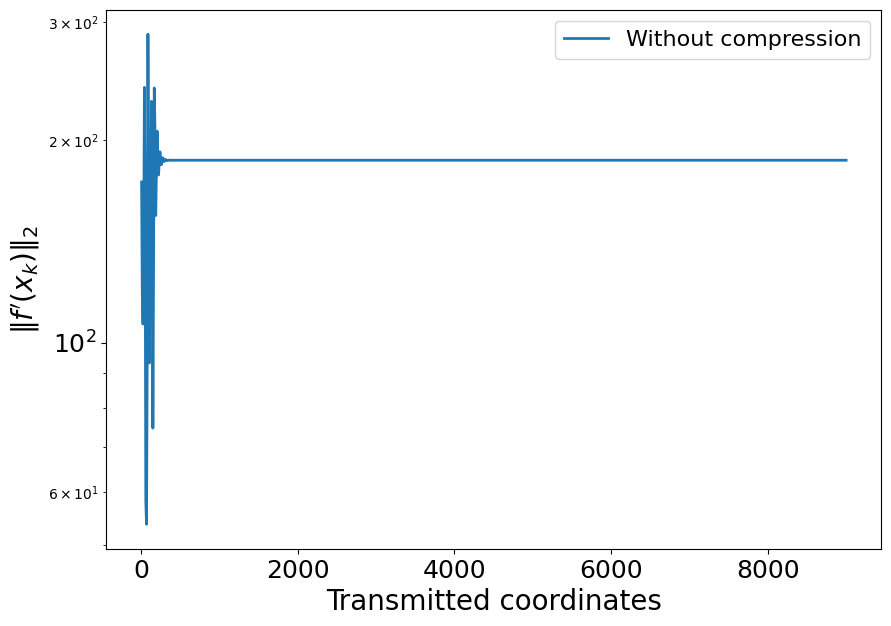

In [16]:
plt.figure(figsize=(10, 7))
for exp in experiments:
    plt.semilogy(
        exp['coords'],
        [grad_norm for grad_norm in exp['gradients']],
        label=exp['name'],
        linewidth=2
    )
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Transmitted coordinates", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)